# Logistic Map
In this notebook, we'll explore polynomial mapping and visulize chaotic behavious arising from very simple non-linear dynamical equations.

## At the end of this notebook, you'll be able to:
* Understand what is logisitic map.
* Visualize the effects of parameters and inital values on logistic map.
* Observe chaos generated from a simple non linear equation.

In [15]:
import numpy as np
import log_map
import matplotlib.pyplot as plt

## Defining Logistic Map
Mathematically, the logistic map is written as:<br>
**$x_{n+1} = r x_n (1 - x_n)$**

where, <br>
**$x_n$** is a number between zero and one, that represents the ratio of existing population to the maximum possible population <br>
**r** is a paramter that can be tuned. Range of interest $[0,4]$.


We will be defining two functions, logisitic_map and logistic_map_time. <br>
**logisitic_map** will return the next state, given the current state and **r**. <br>
**logistic_map_time** will return the evolution of the states over a period of time given an initial state and **r**.

In [16]:
%whos

Variable   Type       Data/Info
-------------------------------
T          int        100
ax         ndarray    2: 2 elems, type `object`, 16 bytes
fig        Figure     Figure(864x864)
log_map    module     <module 'log_map' from '/<...>terials_FA22/log_map.py'>
np         module     <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
r_0        float      3.2
r_1        float      3.6
x0_0       float      0.4444
x0_1       float      0.4443
x_0        float64    0.01
x_array    ndarray    1000: 1000 elems, type `float64`, 8000 bytes


## Visualizing Chaos

### Part 1: Small change in IC, large change in O/P
Now, we have our logistic map, let's plot some graphs to see how different r values (especially beyond $3.5$) can lead to a larger change in the population over time for very small changes in initial conditions.

Let's take two r values, **$r_0 = 3.2$** and **$r_1 = 3.6$**. Also, take two inital conditions **$x_0 = 0.4444$** and **$x_1 = 0.4443$**. Calculate the logistic maps over time ($T = 100$) for the intial condition **$x_0$** and **$x_1$** with **$r_0$** as parameter. Similarly calculate with **$r_1$** as parameter and plot 2 graphs with **time** on **x-axis** and **$x_t$** for the two different initial conditions on **y-axis**. Also, plot the difference between the **$x_t$** for the two inital conditions.

### Part 2: The Cobweb Diagram
The cobweb diagram gives us information on how the initial condition evolves over time. Let's first plot for different **$x_0$** values between 0 and 1, their corresponding **$x_1$** values. Plot **$x_0$** on **x-axis** and **$x_1$** on **y-axis** for **$r_0$** and **$r_1$** separately. Also, plot **$x_0$** vs **$x_0$** (straight line) on the individual graphs for reference. We have already calculated for **Part 1** the logistic maps over time for **$x_0, r_0$** and **$x_0, r_1$**, so lets use this, to see how the population evolves over time for the same intial condition but different **r** values. On the same graph, plot the **$x_t$** values on the **x-axis** and their corresponding **$x_{t+1}$** values on the **y-axis** for both the **$r$** values.

In [17]:
T = 100
x_array = np.linspace(0,1,1000)

x0_0   = 0.4444
x0_1   = 0.4443

r_0 = 3.2
r_1 = 3.6

x_t_00 = log_map.logistic_map_time(x0_0,r_0,T)
x_t_01 = log_map.logistic_map_time(x0_1,r_0,T)
x_t_10 = log_map.logistic_map_time(x0_0,r_1,T)
x_t_11 = log_map.logistic_map_time(x0_1,r_1,T)

x_t_00_x = np.zeros(2*T)
x_t_00_x[0:2*T:2] = x_t_00
x_t_00_x[1:2*T:2] = x_t_00

x_t_10_x = np.zeros(2*T)
x_t_10_x[0:2*T:2] = x_t_10
x_t_10_x[1:2*T:2] = x_t_10


fig, ax  = plt.subplots(3,2,figsize=(12,12))
ax[0,0].plot(np.linspace(1,T,T),x_t_00)
ax[0,0].plot(np.linspace(1,T,T),x_t_01)
ax[0,1].plot(np.linspace(1,T,T),x_t_10)
ax[0,1].plot(np.linspace(1,T,T),x_t_11)

ax[1,0].plot(np.linspace(1,T,T),x_t_00-x_t_01,color='black')
ax[1,1].plot(np.linspace(1,T,T),x_t_10-x_t_11,color='black')

ax[2,0].plot(x_array,r_0*x_array*(1-x_array),color='black')
ax[2,0].plot(x_array,x_array,'--',color='black')
ax[2,0].plot(x_t_00_x[0:2*T-1:1],x_t_00_x[1:2*T:1],color='red',linewidth=1)

ax[2,1].plot(x_array,r_1*x_array*(1-x_array),color='black')
ax[2,1].plot(x_array,x_array,'--',color='black')
ax[2,1].plot(x_t_10_x[0:2*T-1:1],x_t_10_x[1:2*T:1],color='red',linewidth=1)


ax[0,0].set_xlim((1,T))
ax[0,0].set_ylim((0,1))
ax[0,1].set_xlim((1,T))
ax[0,1].set_ylim((0,1))
ax[2,0].set_xlim((0,1))
ax[2,0].set_ylim((0,1))
ax[2,1].set_xlim((0,1))
ax[2,1].set_ylim((0,1))

ax[0,0].set_xlabel('time')
ax[0,1].set_xlabel('time')
ax[1,0].set_xlabel('time')
ax[1,1].set_xlabel('time')

ax[0,0].set_ylabel('x(t)')
ax[0,1].set_ylabel('x(t)')
ax[1,0].set_ylabel('difference between trajectories')
ax[1,1].set_ylabel('difference between trajectories')

ax[0,0].legend(['IC 1, x(t=0)=0.4444','IC 2, x(t=0)=0.4443'])
ax[0,0].set_title('r = '+str(r_0))
ax[0,1].set_title('r = '+str(r_1))
plt.show()

NameError: name 'np' is not defined

## Visualizing the effect of Initial Conditions
In the above cell we have seen that slight change in initial condition leads to a large change in ouput when **r** is greater than some value. Now lets see the effect of different initial conditions on the population. Plot the logistic map over time ($T = 20$) for different initial conditions and two different r values **$r_0 = 2.5$** and **$r_1 = 3.5$**.

NameError: name 'np' is not defined

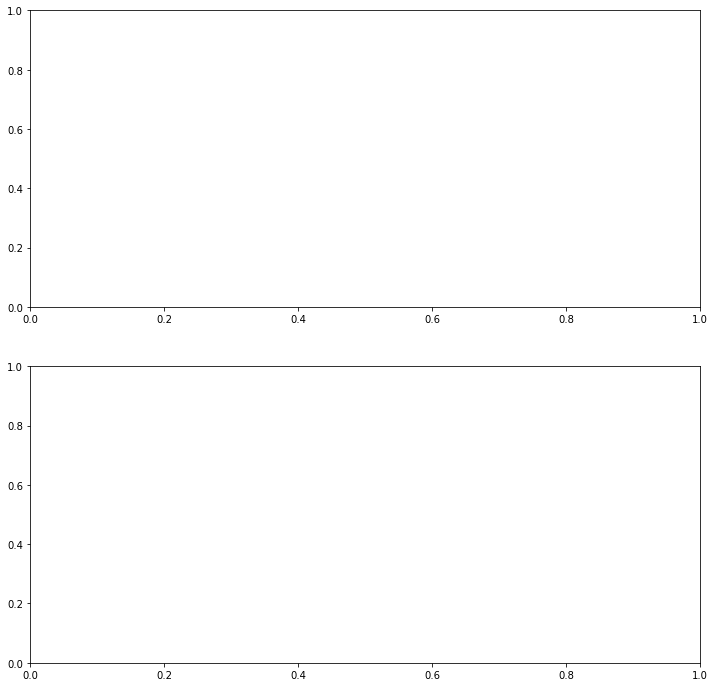

In [11]:
T = 20
x_array = np.linspace(0.01,0.99,100)

r_0 = 2.5
r_1 = 3.5

fig, ax  = plt.subplots(2,1,figsize=(12,12))

for x_0 in x_array:
    x_t1 = log_map.logistic_map_time(x_0,r_0,T)
    x_t2 = log_map.logistic_map_time(x_0,r_1,T)
    ax[0].plot(np.linspace(1,T,T),x_t1)
    ax[1].plot(np.linspace(1,T,T),x_t2)

ax[0].set_title("Effect of initial value")
ax[0].set_xlabel('time')
ax[0].set_ylabel('x(t)')
ax[1].set_xlabel('time')
ax[1].set_ylabel('x(t)')
plt.show()

# Visualizing the effect of the parameter r
Now we have seen that the initial condition doesn't affect the population over time, let's see how the population changes with different **r** values. Plot the logistic map over time ($T = 30$) with initial condition as 0.2 for different **r** values.

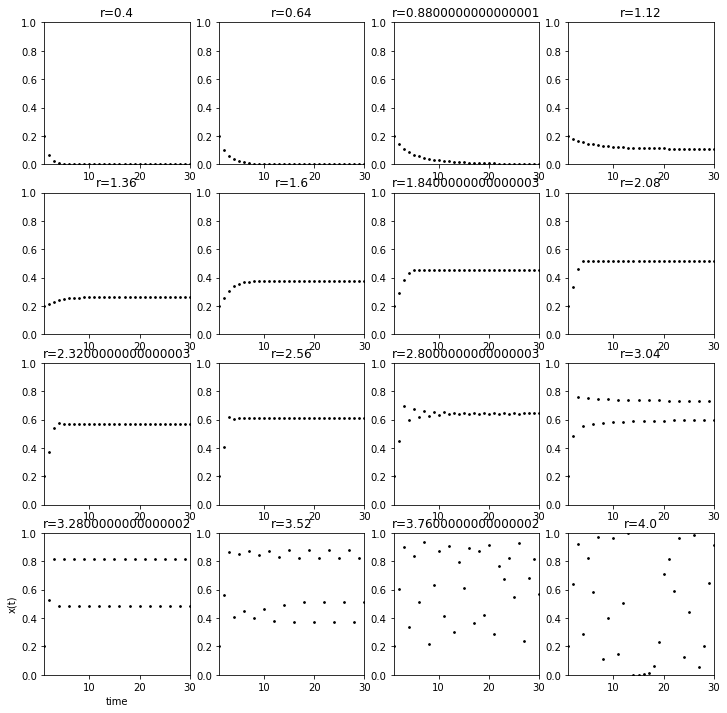

In [5]:
T        = 30

n_r_plot = 16
r_array  = np.linspace(0.4,4,n_r_plot)

fig, ax  = plt.subplots(4,4,figsize=(12,12))
for i_r in range(n_r_plot):
    x_t = logistic_map_time(0.2,r_array[i_r],T)
    ax[i_r//4,i_r%4].scatter(np.linspace(1,T,T),x_t,s=3,c='black')
    ax[i_r//4,i_r%4].set_title('r=' + str(r_array[i_r]))
    ax[i_r//4,i_r%4].set_ylim((0,1))
    ax[i_r//4,i_r%4].set_xlim((1,T))
    
    if i_r == 12:
        ax[i_r//4,i_r%4].set_xlabel('time')
        ax[i_r//4,i_r%4].set_ylabel('x(t)')
    
plt.show()

## Plotting the Bifurcation Diagram (Period Doubling)
From the above plots, we know that initial condition doesn't affect the population and changing the paramter **r** does. Now let's plot the population after it has stabilized over different values of **r**. Compute the logistic map over time ($T = 1000$) for initial condition of 0.2 and different values of r. Let's take the population (**$x_t$**) after time 500 so that it would be stabilized. Plot the **r** values on **x-axis** and **$x_t$** on **y-axis**.

/Users/sriramshreedharan/opt/anaconda3/envs/donkey/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


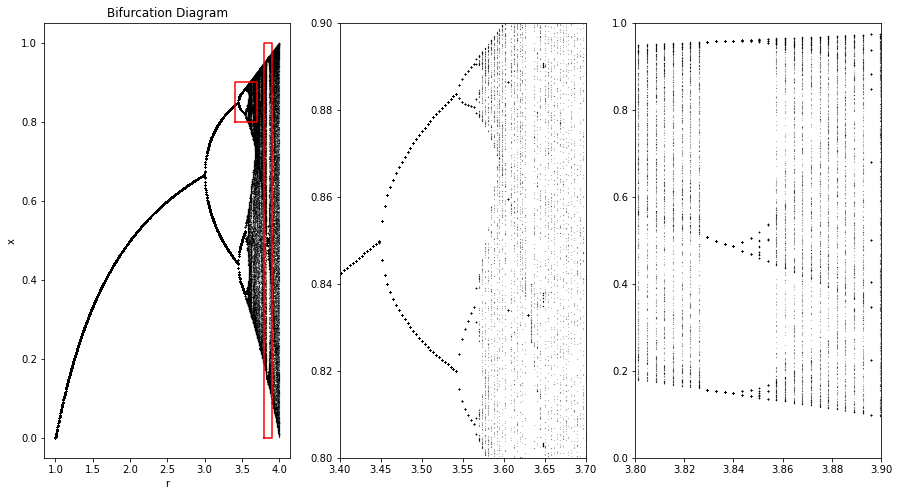

In [26]:
T        = 1000
T_start  = 500

n_r      = 2000
r_array  = np.linspace(1,8,n_r)

fig,ax = plt.subplots(1,3,figsize=(15,8))
for i_r in range(n_r):
    x_t = logistic_map_time(0.2,r_array[i_r],T)
    x_t = x_t[T_start:T:1]
    ax[0].scatter(r_array[i_r]+np.zeros(x_t.size),x_t,s=0.01,c='black')
    ax[1].scatter(r_array[i_r]+np.zeros(x_t.size),x_t,s=0.01,c='black')
    ax[2].scatter(r_array[i_r]+np.zeros(x_t.size),x_t,s=0.01,c='black')

ax[0].set_xlabel('r')
ax[0].set_ylabel('x')
ax[0].set_title('Bifurcation Diagram')

xlim_1 = (3.4,3.7)
ylim_1 = (0.8,0.9)

xlim_1_box = (xlim_1[0],xlim_1[0],xlim_1[1],xlim_1[1],xlim_1[0])
ylim_1_box = (ylim_1[0],ylim_1[1],ylim_1[1],ylim_1[0],ylim_1[0])

xlim_2 = (3.8,3.9)
ylim_2 = (0.0,1.0)

xlim_2_box = (xlim_2[0],xlim_2[0],xlim_2[1],xlim_2[1],xlim_2[0])
ylim_2_box = (ylim_2[0],ylim_2[1],ylim_2[1],ylim_2[0],ylim_2[0])

ax[1].set_xlim(xlim_1)
ax[1].set_ylim(ylim_1)
ax[0].plot(xlim_1_box,ylim_1_box,'-r')
            
ax[2].set_xlim(xlim_2)
ax[2].set_ylim(ylim_2)
ax[0].plot(xlim_2_box,ylim_2_box,'-r')
              
plt.show()

## Plotting the Return Map
For different r values, we have seen that $x_t$ might not settle at one value but might osciallate between multiple values. Let's plot a graph that shows the number of values **x_t** visits for different **r** values.

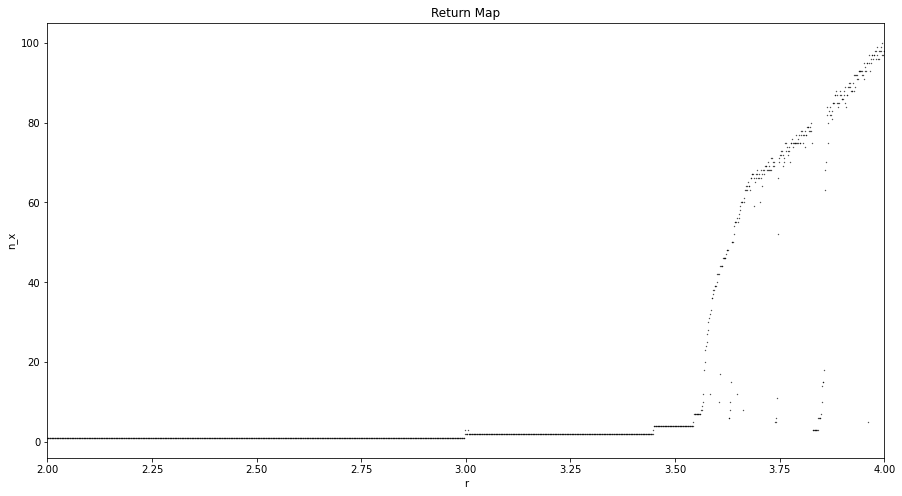

In [25]:
T        = 1000
T_start  = 500

n_r      = 2000
r_array  = np.linspace(1,4,n_r)

fig,ax = plt.subplots(1,1,figsize=(15,8))
for i_r in range(n_r):
    x_t = logistic_map_time(0.2,r_array[i_r],T)
    x_t = x_t[T_start:T:1]
    n_visited = len(np.unique(np.round(x_t - 0.005,2)))
    ax.scatter(r_array[i_r],n_visited,s=0.1,c='black')

ax.set_title('Return Map')
ax.set_xlim(2,4)
ax.set_xlabel('r')
ax.set_ylabel('n_x')
              
plt.show()

## References
* https://en.wikipedia.org/wiki/Logistic_map
* May, Robert M. (1976). "Simple mathematical models with very complicated dynamics". Nature. 261 (5560): 459–467. Bibcode:1976Natur.261..459M. Paper: [Link](https://www.nature.com/articles/261459a0)